In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [9]:
data = pd.read_csv('fashion-mnist_train.csv', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(60000, 785)
['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel9

data.head()

In [10]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [31]:
data['label']=np.where(data['label'] == '1', 'Extra', data['label'])
data['label']=np.where(data['label'] == '2', 'Extra', data['label'])
data['label']=np.where(data['label'] == '3', 'Extra', data['label'])
data['label']=np.where(data['label'] == '4', 'Extra', data['label'])
data['label']=np.where(data['label'] == '6', 'Extra', data['label'])
data['label']=np.where(data['label'] == '8', 'Extra', data['label'])
data['label']=np.where(data['label'] == '9', 'Extra', data['label'])
data['label']=np.where(data['label'] == '0', 'Extra', data['label'])

In [32]:
data['label'].unique()

array(['Extra', '5', '7'], dtype=object)

In [33]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data.groupby('label').mean()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
5,0.000000,0.000000,0.000000,0.000000,0.002667,0.002667,0.003000,0.004667,0.026500,0.043167,...,0.364500,0.394500,0.647833,1.520500,2.576667,2.821500,3.420500,3.696167,1.635667,0.053833
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011333,0.010000,0.010833,0.011500,0.013167,0.011833,0.013500,0.018667,0.019667,0.000000
Extra,0.001125,0.007687,0.044167,0.127417,0.309625,0.514000,1.006833,2.747271,7.099188,18.105563,...,43.234771,29.075292,20.653000,22.145292,28.194792,22.035187,10.221542,2.977271,0.862479,0.081083


In [43]:
print(data.row)

AttributeError: 'DataFrame' object has no attribute 'row'

In [44]:
data.shape

(60000, 785)

In [45]:
data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Extra,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,Extra,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Extra,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,Extra,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [48]:
modData = data.set_index("label")

In [49]:
modData.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
Extra,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
modData.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
modData.reset_index()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
modData.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
modData['pixel77'].unique()

array([  0, 226, 111, 152, 153, 252,  48, 171,   1,  73,   7,   2, 220,
       129,  14,  45, 139,  75,  79, 160, 255,  21, 159, 234,  18, 162,
       170,  24,  39, 103,  84, 248, 203,  77, 150, 110,  25, 242,  52,
        35, 102, 184, 197, 236,  29,  13, 224, 121, 126,  33,  42, 128,
       133, 178,  97,  68,   9,  11, 232,   5,  86, 207, 194, 167, 223,
        61, 188,   3, 246,  16,  53, 181, 108,  43, 173, 122, 107,  90,
        17,  60, 123,   8, 100, 125,  95, 132, 161, 140,  62,  31, 115,
       113,  38, 175,  81, 198, 101,  36, 199,  69, 201,  12, 127,  88,
        15, 219, 185, 104, 225,  54,   6, 143,  41, 146,  82, 241, 165,
       205, 229, 149, 222, 210, 151,  71, 187, 204,  72, 164, 124, 176,
       208,  51, 195,  98, 106,  27,  94,  55, 216, 196, 253, 155, 200,
        19,   4, 130, 169,  85,  92,  64,  91, 134, 114,  89, 180,  58,
       138, 117, 212, 136,  50, 240, 218,  66, 166, 189, 211, 209,  76,
        10, 183,  44,  49,  37, 228,  30, 179,  65, 237, 190, 17

In [65]:
print(modData)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
label                                                                           
5           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
7           0       0       

In [66]:
print(data)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      Extra       0       0       0       0       0       0       0       0   
1      Extra       0       0       0       0       0       0       0       0   
2      Extra       0       0       0       0       0       0       0       5   
3      Extra       0       0       0       1       2       0       0       0   
4      Extra       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995  Extra       0       0       0       0       0       0       0       0   
59996  Extra       0       0       0       0       0       0       0       0   
59997  Extra       0       0       0       0       0       0       0       0   
59998  Extra       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [67]:
modData.reset_index()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
modData = modData.reset_index()

In [79]:
modData['label'].unique()

array([nan], dtype=object)

In [70]:
data['label'].value_counts()

Extra    48000
7         6000
5         6000
Name: label, dtype: int64

In [78]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
modData = data

In [82]:
modData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
modData = modData.set_index("label")

In [84]:
modData = modData.drop("Extra", axis=0)

In [94]:
modData.head()

AttributeError: 'function' object has no attribute 'head'

In [95]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
modData.head()

AttributeError: 'function' object has no attribute 'head'

In [97]:
print(modData)

<bound method DataFrame.reset_index of        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
label                                                                           
5           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0 

In [98]:
modData.head()

AttributeError: 'function' object has no attribute 'head'

In [99]:
modData = data

In [100]:
modData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
modData.set_index('label')

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
Extra,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0


In [102]:
modData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extra,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,Extra,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Extra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
modData = modData.set_index("label")

In [104]:
modData.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extra,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
Extra,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
Extra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
modData = modData.drop("Extra", axis=0)
modData.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
modData.reset_index()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
modData.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
modData = modData.reset_index()

In [109]:
modData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
saveMod = modData

In [112]:
modData.rename(label={'5':'0', '7':'1'})

TypeError: rename() got an unexpected keyword argument 'label'

In [113]:
modData = modData.set_index("label")

In [114]:
modData.rename(index = {'5':'0', '7':'1'})

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
modData.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
modData = modData.rename(index = {'5':'0', '7':'1'})

In [117]:
modData = modData.reset_index()

In [118]:
modData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
modData['label'].unique()

array(['0', '1'], dtype=object)

In [120]:
modData['label'].value_counts()

1    6000
0    6000
Name: label, dtype: int64

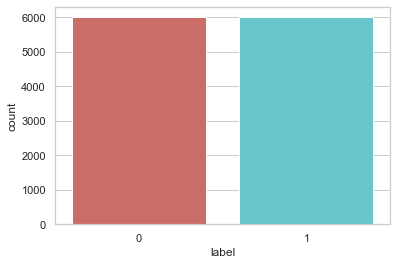

<Figure size 432x288 with 0 Axes>

In [121]:
sns.countplot(x='label', data = modData, palette = 'hls')
plt.show()
plt.savefig('Label_count_plot')

In [122]:
saveMod = modData

In [123]:
print(modData['label'].type())

AttributeError: 'Series' object has no attribute 'type'

In [125]:
modData.types()

AttributeError: 'DataFrame' object has no attribute 'types'

In [126]:
modData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
modData['label'] = modData['label'].astype(int)

In [128]:
print(modData.dtypes)

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object


In [129]:
count_sandals = len(modData[modData['label']==0])
print(count_sandals)

6000


In [130]:
count_sneaker = len(modData[modData['label']==1])

In [131]:
data.groupby('label').mean()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
5,0.000000,0.000000,0.000000,0.000000,0.002667,0.002667,0.003000,0.004667,0.026500,0.043167,...,0.364500,0.394500,0.647833,1.520500,2.576667,2.821500,3.420500,3.696167,1.635667,0.053833
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011333,0.010000,0.010833,0.011500,0.013167,0.011833,0.013500,0.018667,0.019667,0.000000
Extra,0.001125,0.007687,0.044167,0.127417,0.309625,0.514000,1.006833,2.747271,7.099188,18.105563,...,43.234771,29.075292,20.653000,22.145292,28.194792,22.035187,10.221542,2.977271,0.862479,0.081083


In [132]:
modData.groupby('label').mean()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.002667,0.002667,0.003,0.004667,0.0265,0.043167,...,0.364500,0.3945,0.647833,1.5205,2.576667,2.821500,3.4205,3.696167,1.635667,0.053833
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0000,0.000000,...,0.011333,0.0100,0.010833,0.0115,0.013167,0.011833,0.0135,0.018667,0.019667,0.000000


In [133]:
y = modData.iloc['label'].values

TypeError: Cannot index by location index with a non-integer key

In [134]:
y = modData.iloc[0].values

In [135]:
print(y)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [136]:
y=0

In [137]:
modData['label'].unique()

array([0, 1])

In [138]:
y = modData.iloc[1]

In [139]:
print(y)

label       1
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 1, Length: 785, dtype: int64


In [140]:
y = modData.iloc[1].values

In [141]:
print(y)

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [142]:
y = modData.iloc[:,1].values

In [143]:
print(y)

[0 0 0 ... 0 0 0]


In [145]:
x = modData.iloc[:, [2:783]]

SyntaxError: invalid syntax (<ipython-input-145-fb92e6a67f2a>, line 1)

In [146]:
x = modData.iloc[:, 2:].values

In [147]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [148]:
import sklearn

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
xtrain, xtest, ytrain, ytest, = train_test_split(x, y, test_size = 0.25, random_state=0)

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
sc_x = StandardScaler()

In [155]:
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [156]:
print(xtrain[0:10, :])

[[ 0.          0.          0.         ... -0.12521646 -0.08704734
  -0.02905969]
 [ 0.          0.          0.         ... -0.12521646 -0.08704734
  -0.02905969]
 [ 0.          0.          0.         ... -0.12521646 -0.08704734
  -0.02905969]
 ...
 [ 0.          0.          0.         ... -0.12521646 -0.08704734
  -0.02905969]
 [ 0.          0.          0.         ... -0.12521646 -0.08704734
  -0.02905969]
 [ 0.          0.          0.         ... -0.12521646 -0.08704734
  -0.02905969]]


In [157]:
print(xtrain[0:10, 0:10])

[[ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.          0.          0.         -0.01054151 -0.01198664 -0.0126405
  -0.0159617  -0.01174529 -0.01788582 -0.02121782]
 [ 0.   

In [158]:
print(xtrain[0:10, 2:5])

[[ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]
 [ 0.         -0.01054151 -0.01198664]]


In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
classfier = LogisticRegression(random_state = 0)

In [161]:
classifier.fit(xtrain, ytrain)

NameError: name 'classifier' is not defined

In [162]:
classifier = LogisticRegression(random_state = 0)

In [163]:
classifier.fit(xtrain, ytrain)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [164]:
print(ytrain)

[0 0 0 ... 0 0 0]


In [165]:
print(ytrain==1)

[False False False ... False False False]


In [169]:
# ytrain only has 0s
if len(np.sum(ytrain)) in [len(ytrain), 0]:
    print("All in one Class")
else:
    classifier.fit(xtrain, ytrain)

TypeError: object of type 'numpy.int64' has no len()

In [170]:
lent = len(np.sum(ytrain))

TypeError: object of type 'numpy.int64' has no len()

In [171]:
summin = np.sum(ytrain)
print(summin)

0


In [174]:
print(summin.types)

AttributeError: 'numpy.int64' object has no attribute 'types'